# Heart Disease Prediction Using Machine Learning Models

## 1. Importing the Libraries 

In [40]:
import pandas as pd

## 2. Importing the Dataset

In [41]:
data = pd.read_csv('dataset_heart.csv')

## 3. Taking Care of Missing Values

In [42]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 4. Taking Care of Duplicate Values

In [43]:
data_dup = data.duplicated().any()
data_dup

True

In [44]:
data.drop_duplicates(inplace=True)
data.duplicated().any() # No more duplicate values


False

## 5. Data Processing 

In [45]:
cate_val = [] # categorical values
num_val = [] # numerical values

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        num_val.append(column)

This code is used to automatically categorize the columns in a dataset into two distinct lists: one for categorical variables and another for numerical variables. It does so by examining the number of unique values in each column and using a threshold of 10 unique values to make the distinction. This can be particularly useful when preparing data for analysis or machine learning, as it helps identify the nature of each column, allowing for appropriate data preprocessing or analysis steps to be applied based on the variable type.

In [46]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [47]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## 6. Encoding Categorical Data

In [48]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

### 6.1) One-Hot Enconding

One-hot encoding" is a technique used in data preprocessing to convert categorical data into a numerical format that can be used in machine learning algorithms. It is particularly useful when dealing with categorical variables that have no inherent ordinal relationship but need to be incorporated into machine learning models, which typically work with numerical data.

For example, when one-hot encoding is applied to the 'cp' column, it will create new binary (0 or 1) columns for each category within the 'cp' column. For example, if 'cp' has the values 0, 1, 2, and 3, after one-hot encoding, you might get columns like 'cp_0', 'cp_1', 'cp_2', and 'cp_3'. The value of 1 will be placed in the corresponding column to indicate the presence of that category, while the other 'cp' columns will have 0s.

This way, the 'cp' column is transformed into a set of binary columns representing the different categories in the original column, making it suitable for use in machine learning models that require numerical input data. The 'drop_first=True' option in the pd.get_dummies function ensures that one category is dropped to prevent multicollinearity.

In [49]:
cate_val.remove('sex') # since is already a binary field
cate_val.remove('target') # since is already a binary field
data = pd.get_dummies(data, columns=cate_val, drop_first=True)
data = data.astype(int) #converts boolean values to integers (True -> 1 , False -> 0)

In [50]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## 7. Feature Scaling

Feature Scaling is a process used to standardize or normalize the numerical features (columns) in your dataset to ensure that they have similar scales or units. It's an essential preprocessing step, especially when working with machine learning algorithms that are sensitive to the scale of features.

Here's the breakdown of what's happening in the code:

Importing StandardScaler: I'm first importing the StandardScaler class from the scikit-learn (sklearn) library. This class provides a convenient way to perform feature scaling by standardizing the features such that they have a mean of 0 and a standard deviation of 1.

Creating an Instance of StandardScaler: I create an instance of the StandardScaler class and store it in the variable st. This instance will be used to perform the scaling operation.

Selecting Numerical Features: In the code, I have a list of numerical feature names stored in the variable num_val. These are the features that I want to scale. Numerical features typically include things like age, income, or any other continuous numerical data.

Performing Feature Scaling: I apply the fit_transform method of the StandardScaler to the selected numerical features in the DataFrame 'data.' The fit_transform method calculates the mean and standard deviation of each feature and then scales them accordingly.

It calculates the mean (average) and standard deviation for each numerical feature.
It then subtracts the mean from each value and divides by the standard deviation, effectively "centering" the data around a mean of 0 and scaling it to have a standard deviation of 1.

 This ensures that both features are on the same scale and helps prevent one feature from dominating the other when used in machine learning algorithms. It's especially important when working with algorithms like SVM, K-Means, and Principal Component Analysis (PCA), which rely on distances between data points and can be sensitive to feature scales.


In [51]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[num_val] = st.fit_transform(data[num_val])

In [52]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.151179,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.085738,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.216620,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.717939,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.717939,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 8. Splitting the Dataset Into The Training Set and Test Set

In [53]:
X = data.drop('target', axis=1) # So we can get our independent variables

In [54]:
y = data['target'] # Dependent variable

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### 9. Logistic Regression

Logistic Regression is a statistical and machine learning technique used for binary classification problems, where the goal is to predict the probability that an instance belongs to one of two possible classes. Despite its name, it is a classification algorithm, not a regression algorithm.

Here's how Logistic Regression works:

1. **Input Data:** You start with a dataset that contains a set of input features (independent variables) and the corresponding binary target variable (dependent variable) where the two classes are typically labeled as 0 and 1.

2. **Model Function:** Logistic Regression uses the logistic function (also called the sigmoid function) to model the relationship between the input features and the probability of belonging to the positive class (class 1). The logistic function maps any input to a value between 0 and 1.

3. **Model Parameters:** In Logistic Regression, you have model parameters, including weights and a bias term, that need to be learned from the training data. The learning process typically involves optimization algorithms like gradient descent to find the best parameter values that minimize a cost function, such as the log-likelihood.

4. **Decision Boundary:** Once the model parameters are learned, you can use the logistic function to predict the probability of an input belonging to the positive class. By choosing a threshold (e.g., 0.5), you can classify instances into one of the two classes.

Key characteristics of Logistic Regression:

- It provides a probabilistic interpretation, so you not only get class labels but also the probability of the instance belonging to a particular class.
- It is a simple and interpretable model, making it easy to understand the relationship between input features and the target variable.
- Logistic Regression can be regularized to prevent overfitting, and it can handle multicollinearity among input features.
- While it is primarily used for binary classification, there are extensions like Multinomial Logistic Regression that can handle multiple classes.

Logistic Regression is widely used in various fields, including medicine (for disease classification), marketing (for customer churn prediction), and natural language processing (for sentiment analysis), among others. It serves as a fundamental building block in the field of machine learning and is often used as a baseline model for binary classification tasks.

In [57]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.151179,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.085738,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.216620,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.717939,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.717939,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log = LogisticRegression() # creating instance for the model
log.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred1 = log.predict(X_test) # predictinyt values based on the X_test dataset

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, y_pred1)

0.8360655737704918

### 10. SVC: Support Vector Classifier

SVC stands for Support Vector Classifier, and it is a type of supervised machine learning algorithm used for classification tasks. It is a part of the broader family of Support Vector Machines (SVM), which can be used for both classification and regression.

Here's how an SVC works:

1. **Data Points:** In a classification problem, you have a dataset with labeled data points, where each data point belongs to one of two or more classes.

2. **Objective:** The goal of an SVC is to find a hyperplane that best separates the data points into different classes. This hyperplane should have the maximum margin between the classes, which means that it should be positioned in a way that the distance between the hyperplane and the nearest data points from each class (these data points are called support vectors) is maximized.

3. **Support Vectors:** Support vectors are the data points that are closest to the hyperplane. They play a crucial role in defining the margin and, as a result, the decision boundary.

4. **Classification:** Once the SVC has identified the optimal hyperplane, it can classify new, unlabeled data points by determining on which side of the hyperplane they fall. This decision is made based on the sign of the distance of the new data point from the hyperplane.

SVCs are effective for a wide range of classification tasks, and they are particularly useful when the data is not linearly separable. In such cases, the SVC can map the data into a higher-dimensional space (using a kernel trick) where it becomes linearly separable.

There are various parameters and settings that can be adjusted in an SVC to fine-tune its performance, including the choice of kernel function, regularization parameters, and more.

It's important to note that while SVCs are effective, they may not be the best choice for very large datasets, as the training process can be computationally intensive. In such cases, other algorithms like gradient-boosted trees or deep learning methods might be more appropriate.

In [63]:
from sklearn import svm

In [64]:
svm = svm.SVC() # creating instance for the model

In [65]:
svm.fit(X_train, y_train)

SVC()

In [66]:
y_pred2 = svm.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred2)

0.7540983606557377

### 11. KNeighbors Classifier

The K-Nearest Neighbors (KNN) Classifier is a machine learning algorithm used for both classification and regression tasks. In the context of classification, it's often referred to as the "K-Nearest Neighbors Classifier." KNN is a simple and intuitive algorithm that makes predictions based on the majority class of its K nearest neighbors in the feature space.

Here's how the K-Nearest Neighbors Classifier works:

1. **Training Phase:** During the training phase, the algorithm simply memorizes the training data, including the input feature vectors and their corresponding class labels.

2. **Prediction Phase:** When you want to make a prediction for a new, unlabeled data point, the algorithm identifies the K training examples (data points) that are closest to the new data point in terms of feature similarity. The similarity is often measured using distance metrics like Euclidean distance or Manhattan distance, but other metrics can be used as well.

3. **Majority Vote:** Once the K nearest neighbors are identified, the algorithm counts how many of them belong to each class. It then assigns the class label to the new data point based on the majority class among its K nearest neighbors. If K is an odd number, ties can be easily resolved; if K is even, you may need additional rules to break ties.

Key characteristics and considerations of the K-Nearest Neighbors Classifier:

- The choice of the parameter K (the number of neighbors to consider) is crucial. Smaller values of K can make the model sensitive to noise, while larger values can smooth the decision boundaries but might oversimplify the model.
- KNN is a non-parametric and lazy learning algorithm, meaning it doesn't make strong assumptions about the underlying data distribution, and it doesn't learn a specific functional form for the decision boundary during training.
- KNN can be applied to both binary and multiclass classification problems.
- It is important to choose an appropriate distance metric based on the nature of your data, as the choice of metric can impact the performance of the algorithm.
- KNN can be computationally expensive, especially for large datasets, as it requires calculating distances to all data points during prediction.

K-Nearest Neighbors is often used for its simplicity and effectiveness, especially when dealing with small to moderately sized datasets and when the decision boundaries are complex and not easily expressed by simple mathematical functions. However, it may not perform as well as other algorithms when dealing with high-dimensional data or when the dataset is imbalanced.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier() # creating instance for the model

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred3 = knn.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred3)

0.7704918032786885

Let's analyze how the model's accuracy changes due to the number of neighbors that are configured

In [73]:
score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [74]:
score

[0.6885245901639344,
 0.7213114754098361,
 0.7704918032786885,
 0.6885245901639344,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344]

n_neighbors = 5 (default) returns the highest accuracy score

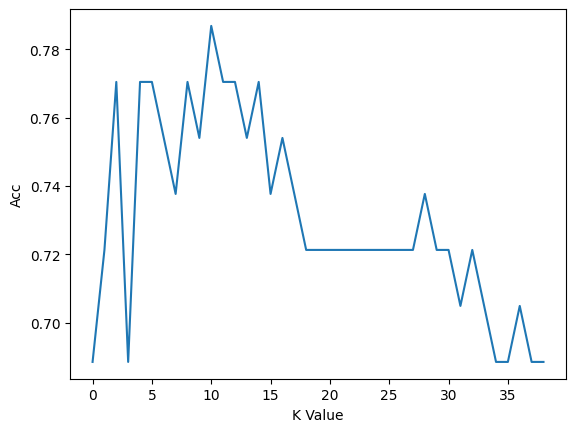

In [121]:
import matplotlib.pyplot as plt

plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

# Non-Linear ML Algorithms
Non-linear machine learning algorithms are a class of algorithms used for modeling complex relationships in data where the relationship between input features and the target variable is not well approximated by a linear function. These algorithms can capture intricate patterns, interactions, and dependencies that linear models may not handle effectively

For non-Linear ML algorithm, pre-processing the data is not required (encoding and feature scalling are not necessary)

In [75]:
data2 = pd.read_csv('dataset_heart.csv')
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
data2.drop_duplicates(inplace=True)
data2.shape

(302, 14)

### Let's separe dependent and independent variables:

In [77]:
X2 = data2.drop('target', axis=1)
y2=data2['target']

In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2)

### 12. Decision Tree Classifier

A Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It's a type of predictive modeling approach that uses a tree-like structure to make decisions and assign class labels to input data based on their features. Decision trees are popular for their simplicity and interpretability.

Here's how a Decision Tree Classifier works:

1. **Tree Structure:** The algorithm builds a tree structure where each node represents a decision or a test on one or more features. The tree starts with a single root node that encompasses the entire dataset.

2. **Node Splitting:** At each internal node, the algorithm selects a feature and a threshold to split the data into two or more subsets. The feature and threshold are chosen based on criteria like Gini impurity, entropy, or information gain, which measure the quality of the split in terms of class purity.

3. **Leaf Nodes:** The process continues recursively until a stopping criterion is met. The stopping criteria might include a maximum tree depth, a minimum number of data points in a node, or a threshold on the impurity measure. When these criteria are met, the node becomes a leaf node, and it is assigned a class label based on the majority class of the data points in that node.

4. **Classification:** To make predictions, you follow the tree from the root node to a leaf node by applying the feature tests at each internal node. The final class label assigned to the input data is determined by the class label associated with the leaf node reached.

Key characteristics and considerations of Decision Tree Classifiers:

- Decision trees are highly interpretable, and you can easily visualize the tree structure and understand the decision-making process.

- They can handle both numerical and categorical features, making them versatile for a wide range of datasets.

- Decision trees are prone to overfitting, especially when the tree is allowed to grow deep. Pruning techniques can help reduce overfitting by simplifying the tree.

- Ensemble methods like Random Forest and Gradient Boosting are often used to improve the predictive performance of decision trees by aggregating multiple trees.

- Decision trees can handle both binary and multiclass classification problems.

- They are sensitive to small variations in the data, and a small change in the training data can lead to different tree structures.

- Decision trees are computationally efficient and can quickly handle large datasets.

Decision Tree Classifiers are widely used in various fields for classification tasks, such as medical diagnosis, customer churn prediction, and spam email detection. They serve as a valuable tool for understanding the relationships between features and class labels in a dataset.

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier()

In [81]:
dt.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [82]:
y_pred4 = dt.predict(X_test2)

In [83]:
accuracy_score(y_test2, y_pred4)

0.8360655737704918

### 13. Random Forest Classifier
The Random Forest Classifier is a popular ensemble machine learning algorithm used for classification tasks. It is an extension of the decision tree algorithm and is known for its high predictive accuracy and robustness against overfitting. Random Forest derives its name from the "forest" of decision trees it creates during the training process.

Here's how the Random Forest Classifier works:

1. **Ensemble of Decision Trees:** A Random Forest is composed of a collection of decision trees. During training, multiple decision trees are built independently and simultaneously. Each tree is trained on a random subset of the data, and at each node of the tree, a random subset of features is considered for splitting. This randomness helps to reduce overfitting.

2. **Voting Mechanism:** When making predictions, each decision tree in the Random Forest independently classifies the input data. In the case of classification tasks, each tree "votes" for a class, and the class that receives the most votes becomes the final prediction. For regression tasks, the average of the predictions from individual trees is taken.

Key characteristics and advantages of the Random Forest Classifier:

- **High Predictive Accuracy:** Random Forest is known for its high accuracy and generalization performance. It can handle both linear and non-linear relationships in the data, making it suitable for a wide range of classification tasks.

- **Reduces Overfitting:** The use of multiple decision trees and feature randomness helps mitigate overfitting, making Random Forest a robust choice for complex datasets.

- **Feature Importance:** Random Forest provides a measure of feature importance, which can be used to understand which features contribute most to the model's predictions.

- **Handles Categorical and Numerical Data:** Random Forest can work with a mix of categorical and numerical features.

- **Out-of-Bag (OOB) Error:** Random Forest can estimate the model's performance without the need for a separate validation set, using the out-of-bag error, which is the error on data points not used for training each tree.

- **Parallel Training:** Random Forest can be parallelized, which means it can take advantage of multi-core processors for faster training.

Random Forest Classifiers are widely used in various domains, including finance, healthcare, image classification, and more, due to their robustness, accuracy, and ease of use. They are often considered a top choice for classification tasks, especially when the dataset is complex or when you want to prioritize model performance over interpretability.

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier() # creating instance for the model

In [86]:
rf.fit(X_train2, y_train2)

RandomForestClassifier()

In [87]:
y_pred5 = rf.predict(X_test2)

In [88]:
accuracy_score(y_test2, y_pred5)

0.9016393442622951

### 14. Gradient Boosting Classifier
The Gradient Boosting Classifier is a powerful ensemble machine learning algorithm used for classification tasks. It belongs to a class of boosting algorithms and is known for its ability to produce highly accurate models by combining the predictions of multiple weak learners, typically decision trees. Gradient Boosting is a sequential, iterative process that aims to improve the model's performance at each step.

Here's how the Gradient Boosting Classifier works:

1. **Initialization:** The algorithm starts with an initial model, which is often a simple one, such as a decision tree with a small depth (a "weak learner"). This initial model is used to make predictions on the training data.

2. **Residual Calculation:** The algorithm calculates the residuals, which are the differences between the actual target values and the predictions made by the initial model. These residuals represent the errors or misclassifications made by the initial model.

3. **Sequential Model Building:** The algorithm then builds a sequence of new models (typically decision trees) to predict the residuals from the previous step. These new models are added to the ensemble, and each one is designed to correct the errors made by the existing ensemble. The predictions from these new models are weighted by a learning rate.

4. **Weighted Voting:** The predictions from the ensemble of models are combined through a weighted voting mechanism. The weights for each model are determined during the training process. The combination of these models aims to minimize the overall prediction error.

5. **Iterative Process:** Steps 2 to 4 are repeated for a specified number of iterations or until a certain level of model performance is achieved.

Key characteristics and advantages of the Gradient Boosting Classifier:

- **High Predictive Accuracy:** Gradient Boosting is known for its high predictive accuracy and is often one of the top-performing algorithms for various classification tasks.

- **Robust Against Overfitting:** By sequentially fitting models to the residuals, Gradient Boosting is less prone to overfitting compared to decision trees.

- **Feature Importance:** It can provide feature importance scores, which help identify the most informative features.

- **Flexibility:** Gradient Boosting can work with a mix of data types, including categorical and numerical features.

- **Can Handle Imbalanced Data:** It can be adapted to handle imbalanced datasets by adjusting class weights.

- **Out-of-Bag (OOB) Error:** Similar to Random Forest, Gradient Boosting can estimate the model's performance using out-of-bag error.

Gradient Boosting Classifiers are commonly used in various domains, including finance, healthcare, and natural language processing, where high predictive accuracy is essential. Notable implementations of Gradient Boosting include XGBoost, LightGBM, and CatBoost, which are optimized versions of the algorithm known for their speed and performance.

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gbc = GradientBoostingClassifier()

In [91]:
gbc.fit(X_train2, y_train2)

GradientBoostingClassifier()

In [92]:
y_pred6 = gbc.predict(X_test2)

In [93]:
accuracy_score(y_test2, y_pred6)

0.8852459016393442

In [94]:
final_data = pd.DataFrame({'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'], 
                           'ACC': [ accuracy_score(y_test, y_pred1),
                                    accuracy_score(y_test, y_pred2),
                                    accuracy_score(y_test, y_pred3),
                                    accuracy_score(y_test2, y_pred4),
                                    accuracy_score(y_test2, y_pred5),
                                    accuracy_score(y_test2, y_pred6)]})

final_data

,Models,ACC
0,LR,0.836066
1,SVM,0.754098
2,KNN,0.770492
3,DT,0.836066
4,RF,0.901639
5,GB,0.885246


We can see that Random Forest is the best model for our dataset

<Axes: xlabel='Models', ylabel='ACC'>

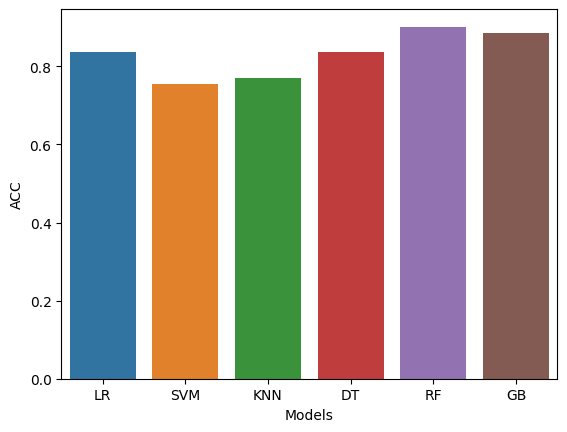

In [97]:
import seaborn as sns

sns.barplot(x=final_data['Models'], y=final_data['ACC'])


### Having made our selection among all the models, we will proceed to train our top-performing model using the entire dataset

In [105]:
X = data2.drop('target', axis=1)
y = data2['target']

X.shape

(302, 13)

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 15. Prediction on New Data

In [132]:
import pandas as pd

new_data = pd.DataFrame({
    'age': 52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
}, index=[0])

new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [131]:
pred = rf.predict(new_data)

for i in range(len(new_data)):
    if pred[0]==0 :
        print('The Person does not have a Heart Disease')
    else:
        print('The Person has Heart Disease')

The Person does not have a Heart Disease


We can load a new dataset and test for all the records in it:

In [133]:
new_data_2 = pd.read_csv('heart.csv')
new_data_2 = new_data_2.drop('target', axis=1)

In [134]:
pred = rf.predict(new_data_2)

for i in range(len(new_data_2)):
    if pred[i]==0 :
        print('The Person does not have a Heart Disease')
    else:
        print('The Person has Heart Disease')

The Person does not have a Heart Disease
The Person does not have a Heart Disease
The Person does not have a Heart Disease
The Person does not have a Heart Disease
The Person does not have a Heart Disease
The Person has Heart Disease
The Person does not have a Heart Disease
The Person does not have a Heart Disease
The Person does not have a Heart Disease
The Person does not have a Heart Disease
The Person has Heart Disease
The Person does not have a Heart Disease
The Person has Heart Disease
The Person does not have a Heart Disease
The Person does not have a Heart Disease
The Person has Heart Disease
The Person has Heart Disease
The Person does not have a Heart Disease
The Person has Heart Disease
The Person has Heart Disease
The Person does not have a Heart Disease
The Person has Heart Disease
The Person has Heart Disease
The Person has Heart Disease
The Person has Heart Disease
The Person does not have a Heart Disease
The Person has Heart Disease
The Person does not have a Heart Dise

### 16. Save Model Using Joblib

In [111]:
import joblib

joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [113]:
model = joblib.load('model_joblib_heart')
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [115]:
from tkinter import *
import joblib

In [122]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

c:\Users\Daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
